In [1]:
import requests
import random
import pandas as pd
import json
from api_keys import weather_api_key
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from matplotlib import rcParams

%load_ext lab_black

In [2]:
path = os.path.join(
    "..",
    "..",
    "UTA-AUS-DATA-PT-07-2020-U-C",
    "homework",
    "06-Python-APIs",
    "Instructions",
    "output_data",
    "cities.csv",
)

In [3]:
cities_data = pd.read_csv(path)

In [4]:
cities_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
...,...,...,...,...,...,...,...,...,...,...
543,543,yabrud,0,SY,1558378840,32,33.97,36.66,80.60,8.05
544,544,paraiso,5,MX,1558378898,4,24.01,-104.61,84.20,16.11
545,545,veraval,0,FR,1558378898,62,49.65,0.71,61.00,8.05
546,546,novyy urgal,100,RU,1558378899,93,51.07,132.56,49.74,2.68


In [5]:
cities_data.dtypes

City_ID         int64
City           object
Cloudiness      int64
Country        object
Date            int64
Humidity        int64
Lat           float64
Lng           float64
Max Temp      float64
Wind Speed    float64
dtype: object

# Cities List

In [6]:
cities_list = cities_data["City"].to_list()
cities_list

['ostrovnoy',
 'mahebourg',
 'qaanaaq',
 'zhuhai',
 'cape town',
 'atuona',
 'flinders',
 'opuwo',
 'tiksi',
 'pushkinskiye gory',
 'aykhal',
 'castro',
 'avarua',
 'saskylakh',
 'constitucion',
 'albany',
 'vilyuysk',
 'ushuaia',
 'bambous virieux',
 'kodinsk',
 'teknaf',
 'busselton',
 'ambon',
 'maragogi',
 'fallon',
 'kantang',
 'colonelganj',
 'punta arenas',
 'rikitea',
 'new norfolk',
 'gobabis',
 'qingdao',
 'port hardy',
 'arman',
 'mamakan',
 'bethel',
 'clinton',
 'varhaug',
 'ayan',
 'mayor pablo lagerenza',
 'hermanus',
 'torbay',
 'yellowknife',
 'kruisfontein',
 'puerto ayora',
 'rosita',
 'beloha',
 'port elizabeth',
 'port alfred',
 'garchitorena',
 'kodiak',
 'mar del plata',
 'taybad',
 'cabo san lucas',
 'tiarei',
 'khatanga',
 'pisco',
 'kolyvan',
 'hofn',
 'bontang',
 'sault sainte marie',
 'zhigansk',
 'thompson',
 'pevek',
 'nanortalik',
 'bilibino',
 'dikson',
 'hambantota',
 'beja',
 'fortuna',
 'ponta do sol',
 'qasigiannguit',
 'butaritari',
 'virginia beach

In [7]:
def extract_data(data):
    return {
        "name": data["name"],
        "lat": data["coord"]["lat"],
        "lon": data["coord"]["lon"],
        "Temperature (F)": data["main"]["temp"],
        "Humidity_%": data["main"]["humidity"],
        "Cloudiness_%": data["clouds"]["all"],
        "Wind Speed_mph": data["wind"]["speed"],
    }

In [8]:
cities_results = []

In [9]:
for city in cities_list:
    data = requests.get(
        "http://api.openweathermap.org/data/2.5/weather",
        params={"q": city, "appid": weather_api_key, "units": "imperial"},
    ).json()
    city_result = extract_data(data)
    cities_results.append(city_result)
cities_results

[{'name': 'Ostrovnoy',
  'lat': 68.05,
  'lon': 39.51,
  'Temperature (F)': 43.09,
  'Humidity_%': 82,
  'Cloudiness_%': 99,
  'Wind Speed_mph': 10.74},
 {'name': 'Mahébourg',
  'lat': -20.41,
  'lon': 57.7,
  'Temperature (F)': 69.8,
  'Humidity_%': 83,
  'Cloudiness_%': 75,
  'Wind Speed_mph': 4.7},
 {'name': 'Qaanaaq',
  'lat': 77.48,
  'lon': -69.36,
  'Temperature (F)': 12.7,
  'Humidity_%': 76,
  'Cloudiness_%': 91,
  'Wind Speed_mph': 7.9},
 {'name': 'Zhuhai',
  'lat': 22.28,
  'lon': 113.57,
  'Temperature (F)': 82.47,
  'Humidity_%': 83,
  'Cloudiness_%': 40,
  'Wind Speed_mph': 16.11},
 {'name': 'Cape Town',
  'lat': -33.93,
  'lon': 18.42,
  'Temperature (F)': 45.25,
  'Humidity_%': 93,
  'Cloudiness_%': 40,
  'Wind Speed_mph': 4.7},
 {'name': 'Atuona',
  'lat': -9.8,
  'lon': -139.03,
  'Temperature (F)': 78.46,
  'Humidity_%': 72,
  'Cloudiness_%': 2,
  'Wind Speed_mph': 12.88},
 {'name': 'Flinders',
  'lat': -34.58,
  'lon': 150.86,
  'Temperature (F)': 64,
  'Humidity_%'

# Convert Raw Data to DataFrame

In [10]:
cities_df = pd.DataFrame(cities_results)
cities_df

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
0,Ostrovnoy,68.05,39.51,43.09,82,99,10.74
1,Mahébourg,-20.41,57.70,69.80,83,75,4.70
2,Qaanaaq,77.48,-69.36,12.70,76,91,7.90
3,Zhuhai,22.28,113.57,82.47,83,40,16.11
4,Cape Town,-33.93,18.42,45.25,93,40,4.70
...,...,...,...,...,...,...,...
543,Yabrūd,33.97,36.66,59.00,82,0,3.36
544,Paraíso,9.84,-83.87,66.27,100,90,2.24
545,Verāval,20.90,70.37,80.06,79,87,7.83
546,Novyy Urgal,51.07,132.56,59.52,61,5,4.94


In [11]:
cities_df.to_csv("cities_df.csv")

### DataFrame Data Analysis

In [12]:
cities_df.describe()

,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,19.486624,22.432281,63.352847,73.363139,49.762774,7.888175
std,33.402215,91.924088,15.653667,19.013165,39.008909,5.249994
min,-54.800000,-175.200000,12.700000,8.000000,0.000000,0.090000
25%,-6.475000,-62.062500,50.227500,65.000000,2.000000,4.000000
50%,20.870000,25.675000,65.200000,78.000000,47.500000,6.825000
75%,47.895000,108.172500,76.395000,87.000000,90.000000,10.560000
max,78.220000,179.320000,94.150000,100.000000,100.000000,27.510000


In [13]:
cities_df.dtypes

name                object
lat                float64
lon                float64
Temperature (F)    float64
Humidity_%           int64
Cloudiness_%         int64
Wind Speed_mph     float64
dtype: object

In [14]:
cities_df.astype({"Humidity_%": "float"}).dtypes

name                object
lat                float64
lon                float64
Temperature (F)    float64
Humidity_%         float64
Cloudiness_%         int64
Wind Speed_mph     float64
dtype: object

In [15]:
cities_df[cities_df["Humidity_%"] > 100]

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph


# Ploting the Data

## Latitude vs. Temperature

In [16]:
cities_lat_temp = cities_df.sort_values("Temperature (F)", ascending=False)[
    ["Temperature (F)", "lat"]
]
cities_lat_temp

,Temperature (F),lat
39,94.15,-19.93
133,93.65,20.50
510,92.73,20.52
358,91.40,-13.85
273,90.86,14.31
...,...,...
309,28.17,72.79
136,27.30,63.75
411,26.60,78.22
175,26.60,70.47


### Latitude vs. Temperature Plot

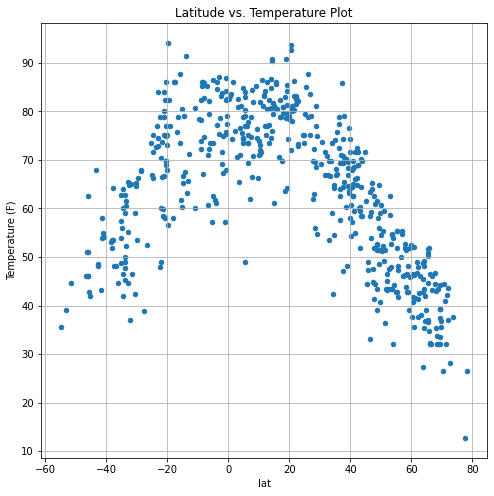

In [17]:
cities_lat_temp.plot(
    kind="scatter",
    x="lat",
    y="Temperature (F)",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Temperature Plot",
)
plt.show()

## Latitude vs. Humidity 

In [18]:
cities_lat_humidity = cities_df.sort_values("Humidity_%", ascending=False)[
    ["Humidity_%", "lat"]
]
cities_lat_humidity

,Humidity_%,lat
174,100,14.87
153,100,6.50
252,100,64.23
331,100,24.34
487,100,16.42
...,...,...
260,15,36.21
214,13,-20.73
83,12,18.90
133,10,20.50


### Latitude vs. Humidity Plot

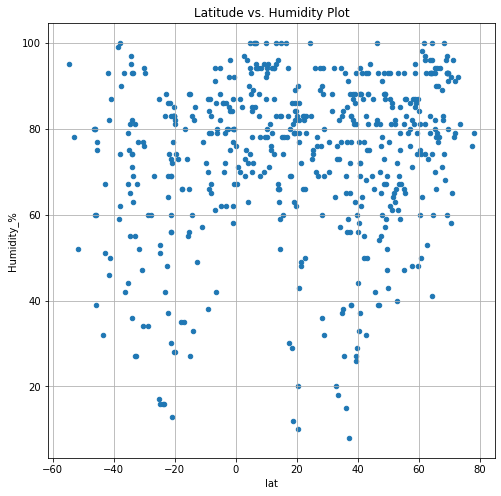

In [19]:
cities_lat_humidity.plot(
    kind="scatter",
    x="lat",
    y="Humidity_%",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Humidity Plot",
)
plt.show()

## Latitude vs. Cloudiness

In [20]:
cities_lat_cloud = cities_df.sort_values("Cloudiness_%", ascending=False)[
    ["Cloudiness_%", "lat"]
]
cities_lat_cloud

,Cloudiness_%,lat
547,100,27.72
345,100,3.65
224,100,53.07
226,100,48.92
55,100,71.97
...,...,...
458,0,52.06
387,0,-4.27
278,0,4.93
275,0,-20.33


### Latitude vs. Cloudiness Plot

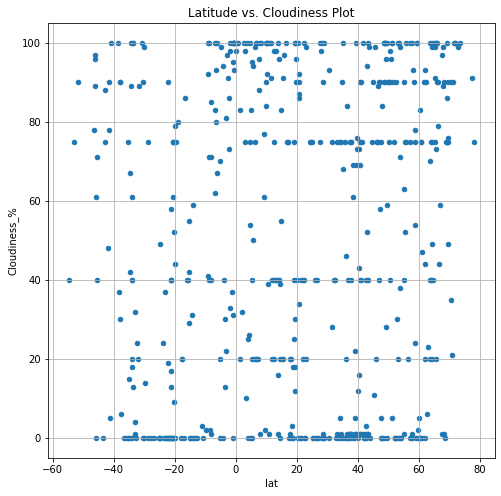

In [21]:
cities_lat_cloud.plot(
    kind="scatter",
    x="lat",
    y="Cloudiness_%",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Cloudiness Plot",
)
plt.show()

## Latitude vs. Wind Speed_mph

In [22]:
cities_lat_wind = cities_df.sort_values("Wind Speed_mph", ascending=False)[
    ["Wind Speed_mph", "lat"]
]
cities_lat_wind

,Wind Speed_mph,lat
438,27.51,-41.41
307,27.00,-45.87
283,25.28,-43.53
329,25.28,39.89
486,24.16,46.81
...,...,...
467,0.40,10.34
514,0.38,19.67
461,0.34,-1.80
77,0.31,47.89


### Latitude vs. Wind SPeed Plot

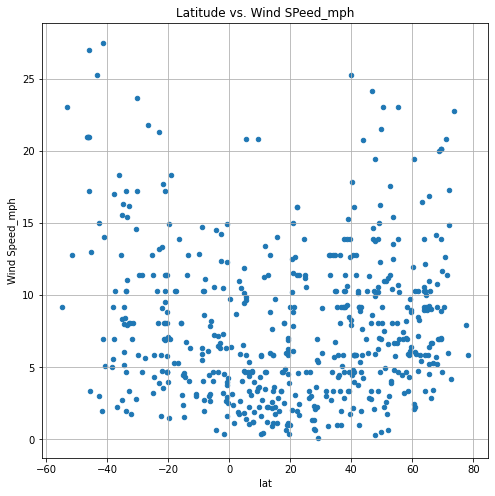

In [23]:
cities_lat_wind.plot(
    kind="scatter",
    x="lat",
    y="Wind Speed_mph",
    grid=True,
    figsize=(8, 8),
    title="Latitude vs. Wind SPeed_mph",
)
plt.show()

# Linear Regression

## Linear Regression - Northern Hemisphere

In [24]:
cities_northern = cities_df[cities_df["lat"] >= 0]
cities_northern

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
0,Ostrovnoy,68.05,39.51,43.09,82,99,10.74
2,Qaanaaq,77.48,-69.36,12.70,76,91,7.90
3,Zhuhai,22.28,113.57,82.47,83,40,16.11
8,Tiksi,71.69,128.87,42.26,78,100,6.02
9,Pushkinskiye Gory,57.02,28.91,54.66,80,0,7.45
...,...,...,...,...,...,...,...
543,Yabrūd,33.97,36.66,59.00,82,0,3.36
544,Paraíso,9.84,-83.87,66.27,100,90,2.24
545,Verāval,20.90,70.37,80.06,79,87,7.83
546,Novyy Urgal,51.07,132.56,59.52,61,5,4.94


In [25]:
x = cities_northern["lat"].to_frame().values

In [26]:
y = cities_northern["Temperature (F)"].values

In [27]:
model = LinearRegression()

In [28]:
model.fit(x, y)

LinearRegression()

In [29]:
intercept = model.intercept_
intercept

88.05418260535129

In [30]:
slope = model.coef_[0]
slope

-0.6851841040804663

In [31]:
r_squared = model.score(x, y)
r_squared

0.7490554981783873

In [32]:
def predict(x):
    return model.predict([[x]])[0]

In [33]:
x_range = np.arange(
    min(cities_northern["Temperature (F)"]),
    max(cities_northern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [34]:
formula = f"y = {round(intercept,3)}+{round(slope, 3)}x"
r_squared_string = f"R**2 = {round(r_squared, 3)}"

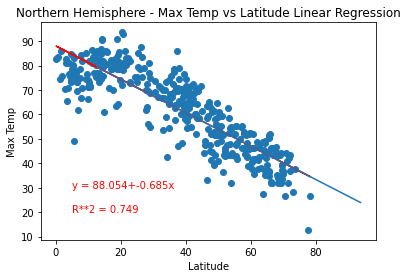

In [35]:
predictions = model.predict(x)

plt.scatter(cities_northern["lat"], cities_northern["Temperature (F)"])
plt.plot(x, predictions, color="red")
plt.plot(x_range, y_predict)
plt.text(5, 30, formula, color="red")
plt.text(5, 20, r_squared_string, color="red")
plt.title("Northern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

## Linear Regression - Southern Hemisphere

In [36]:
cities_southern = cities_df[cities_df["lat"] < 0]
cities_southern

,name,lat,lon,Temperature (F),Humidity_%,Cloudiness_%,Wind Speed_mph
1,Mahébourg,-20.41,57.70,69.80,83,75,4.70
4,Cape Town,-33.93,18.42,45.25,93,40,4.70
5,Atuona,-9.80,-139.03,78.46,72,2,12.88
6,Flinders,-34.58,150.86,64.00,55,42,8.01
7,Opuwo,-18.06,13.84,58.10,35,0,5.26
...,...,...,...,...,...,...,...
523,Kununurra,-15.77,128.73,87.80,55,40,8.05
526,Viedma,-40.81,-63.00,54.09,87,100,5.12
536,Padang,-0.95,100.35,75.27,80,100,6.33
539,Palu,-0.89,119.87,86.85,58,95,1.63


In [37]:
x = cities_southern["lat"].to_frame().values

In [38]:
y = cities_southern["Temperature (F)"].values

In [39]:
model = LinearRegression()

In [40]:
model.fit(x, y)

LinearRegression()

In [41]:
intercept = model.intercept_
intercept

81.6126188391669

In [42]:
slope = model.coef_[0]
slope

0.7055434411720303

In [43]:
r_squared = model.score(x, y)
r_squared

0.5159946669457947

In [44]:
def predict(x):
    return model.predict([[x]])[0]

In [45]:
x_range = np.arange(
    min(cities_southern["Temperature (F)"]),
    max(cities_southern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [46]:
formula = f"y = {round(intercept,3)}+{round(slope, 3)}x"
r_squared_string = f"R**2 = {round(r_squared, 3)}"

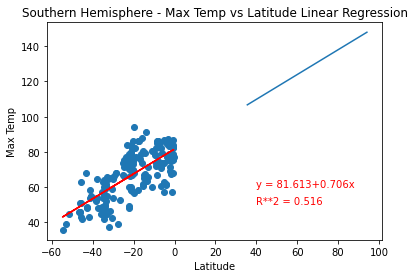

In [47]:
predictions = model.predict(x)

plt.scatter(cities_southern["lat"], cities_southern["Temperature (F)"])
plt.plot(x, predictions, color="red")
plt.text(40, 60, formula, color="red")
plt.text(40, 50, r_squared_string, color="red")
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Temp vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

In [48]:
x = cities_northern["lat"].to_frame().values

In [49]:
y = cities_northern["Humidity_%"].values

In [50]:
model = LinearRegression()

In [51]:
model.fit(x, y)

LinearRegression()

In [52]:
intercept = model.intercept_
intercept

75.2921050003629

In [53]:
slope = model.coef_[0]
slope

0.004683477509915493

In [54]:
r_squared = model.score(x, y)
r_squared

2.8346039949722623e-05

In [55]:
def predict(x):
    return model.predict([[x]])[0]

In [56]:
x_range = np.arange(
    min(cities_northern["Temperature (F)"]),
    max(cities_northern["Temperature (F)"]),
    0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Humidity vs. Latitude Linear Regression

In [57]:
formula = f"y = {round(intercept,3)}+{round(slope, 3)}x"
r_squared_string = f"R**2 = {round(r_squared, 3)}"

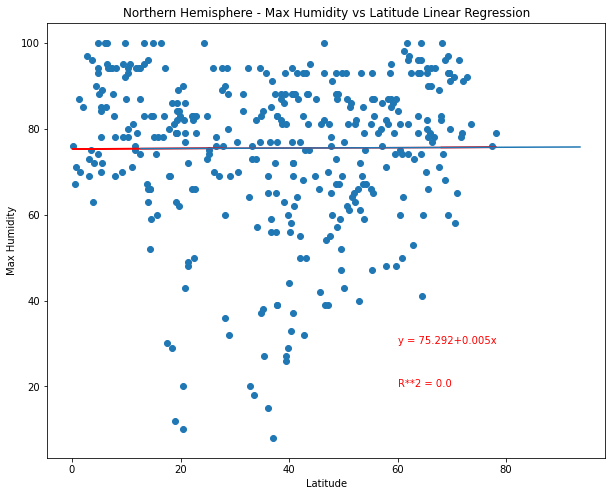

In [58]:
predictions = model.predict(x)

plt.scatter(cities_northern["lat"], cities_northern["Humidity_%"])
plt.plot(x, predictions, color="red")
plt.text(60, 30, formula, color="red")
plt.text(60, 20, r_squared_string, color="red")
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Humidity vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.show()

In [59]:
x = cities_southern["lat"].to_frame().values

In [60]:
y = cities_southern["Humidity_%"].values

In [61]:
model = LinearRegression()

In [62]:
model.fit(x, y)

LinearRegression()

In [63]:
intercept = model.intercept_
intercept

73.1324180718678

In [64]:
slope = model.coef_[0]
slope

0.20583104632701865

In [65]:
r_squared = model.score(x, y)
r_squared

0.020254957482583547

In [66]:
def predict(x):
    return model.predict([[x]])[0]

In [67]:
x_range = np.arange(
    min(cities_northern["Humidity_%"]), max(cities_northern["Humidity_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Humidity vs. Latitude Linear Regression

In [68]:
formula = f"y = {round(intercept,3)}+{round(slope, 3)}x"
r_squared_string = f"R**2 = {round(r_squared, 3)}"

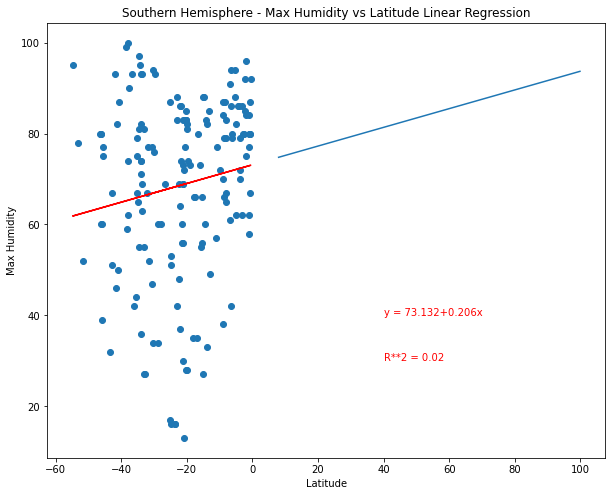

In [69]:
predictions = model.predict(x)

plt.scatter(cities_southern["lat"], cities_southern["Humidity_%"])
plt.plot(x, predictions, color="red")
plt.text(40, 40, formula, color="red")
plt.text(40, 30, r_squared_string, color="red")
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Humidity vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Humidity")
plt.show()

In [70]:
x = cities_northern["lat"].to_frame().values

In [71]:
y = cities_northern["Cloudiness_%"].values

In [72]:
model = LinearRegression()

In [73]:
model.fit(x, y)

LinearRegression()

In [74]:
intercept = model.intercept_
intercept

47.079928027911066

In [75]:
slope = model.coef_[0]
slope

0.14022183166910546

In [76]:
r_squared = model.score(x, y)
r_squared

0.005459983624944265

In [77]:
def predict(x):
    return model.predict([[x]])[0]

In [78]:
x_range = np.arange(
    min(cities_northern["Cloudiness_%"]), max(cities_northern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Cloudiness vs. Latitude Linear Regression

In [79]:
formula = f"y = {round(intercept,3)}+{round(slope, 3)}x"
r_squared_string = f"R**2 = {round(r_squared, 3)}"

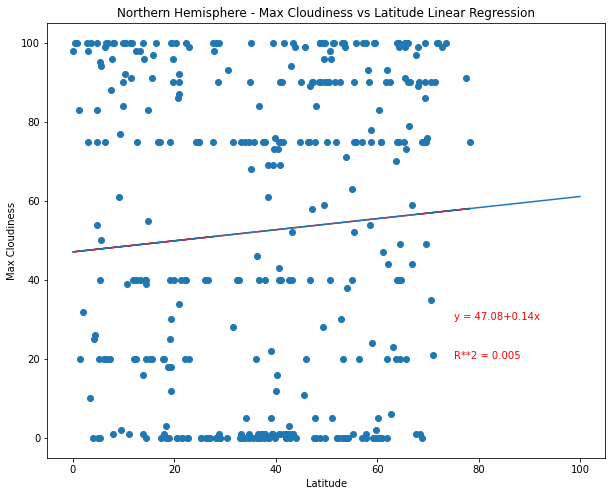

In [80]:
predictions = model.predict(x)

plt.scatter(cities_northern["lat"], cities_northern["Cloudiness_%"])
plt.plot(x, predictions, color="red")
plt.text(75, 30, formula, color="red")
plt.text(75, 20, r_squared_string, color="red")
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Cloudiness vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Cloudiness")
plt.show()

In [81]:
x = cities_southern["lat"].to_frame().values

In [82]:
y = cities_southern["Cloudiness_%"].values

In [83]:
model = LinearRegression()

In [84]:
model.fit(x, y)

LinearRegression()

In [85]:
intercept = model.intercept_
intercept

48.81915679734284

In [86]:
slope = model.coef_[0]
slope

0.22726009837855127

In [87]:
r_squared = model.score(x, y)
r_squared

0.006841485643801715

In [88]:
def predict(x):
    return model.predict([[x]])[0]

In [89]:
x_range = np.arange(
    min(cities_southern["Cloudiness_%"]), max(cities_southern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Cloudiness vs. Latitude Linear Regression

In [90]:
formula = f"y = {round(intercept,3)}+{round(slope, 3)}x"
r_squared_string = f"R**2 = {round(r_squared, 3)}"

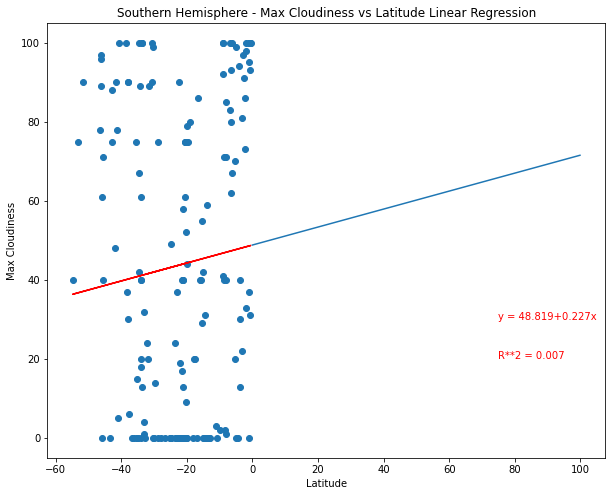

In [91]:
predictions = model.predict(x)

plt.scatter(cities_southern["lat"], cities_southern["Cloudiness_%"])
plt.plot(x, predictions, color="red")
plt.text(75, 30, formula, color="red")
plt.text(75, 20, r_squared_string, color="red")
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Cloudiness vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Cloudiness")
plt.show()

In [92]:
X = cities_northern["lat"].to_frame().values

In [93]:
y = cities_northern["Wind Speed_mph"].values

In [94]:
model = LinearRegression()

In [95]:
model.fit(X, y)

LinearRegression()

In [96]:
intercept = model.intercept_
intercept

4.641987974313908

In [97]:
slope = model.coef_[0]
slope

0.07449168692476536

In [98]:
r_squared = model.score(X, y)
r_squared

0.09581172288736406

In [99]:
def predict(x):
    return model.predict([[x]])[0]

In [100]:
x_range = np.arange(
    min(cities_northern["Cloudiness_%"]), max(cities_northern["Cloudiness_%"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Northern Hemisphere - Max Wind SPeed mph vs. Latitude Linear Regression

In [101]:
formula = f"y = {round(intercept,3)}+{round(slope, 3)}x"
r_squared_string = f"R**2 = {round(r_squared, 3)}"

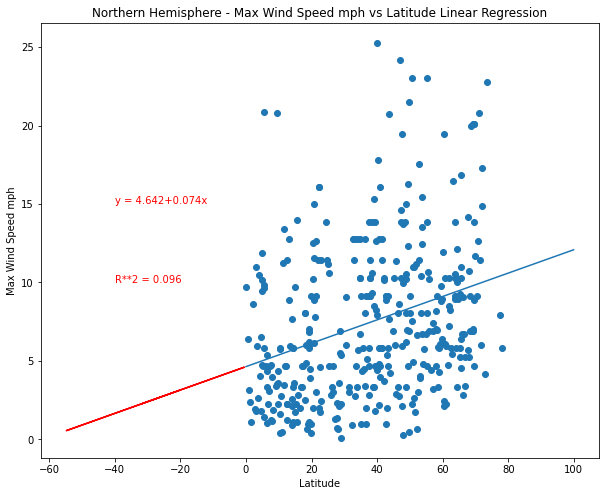

In [102]:
predictions = model.predict(x)

plt.scatter(cities_northern["lat"], cities_northern["Wind Speed_mph"])
plt.plot(x, predictions, color="red")
plt.text(-40, 15, formula, color="red")
plt.text(-40, 10, r_squared_string, color="red")
plt.plot(x_range, y_predict)
plt.title("Northern Hemisphere - Max Wind Speed mph vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed mph")
plt.show()

In [103]:
X = cities_southern["lat"].to_frame().values

In [104]:
y = cities_southern["Wind Speed_mph"].values

In [105]:
model = LinearRegression()

In [106]:
model.fit(X, y)

LinearRegression()

In [107]:
intercept = model.intercept_
intercept

5.120405043045552

In [108]:
slope = model.coef_[0]
slope

-0.1701559762139201

In [109]:
r_squared = model.score(x, y)
r_squared

0.16942227060533188

In [110]:
def predict(x):
    return model.predict([[x]])[0]

In [111]:
def predict(x):
    return model.predict([[x]])[0]

In [112]:
x_range = np.arange(
    min(cities_southern["Wind Speed_mph"]), max(cities_southern["Wind Speed_mph"]), 0.1,
)
y_predict = [predict(x) for x in x_range]

###  Southern Hemisphere - Max Wind SPeed mph vs. Latitude Linear Regression

In [113]:
formula = f"y = {round(intercept,3)}+{round(slope, 3)}x"
r_squared_string = f"R**2 = {round(r_squared, 3)}"

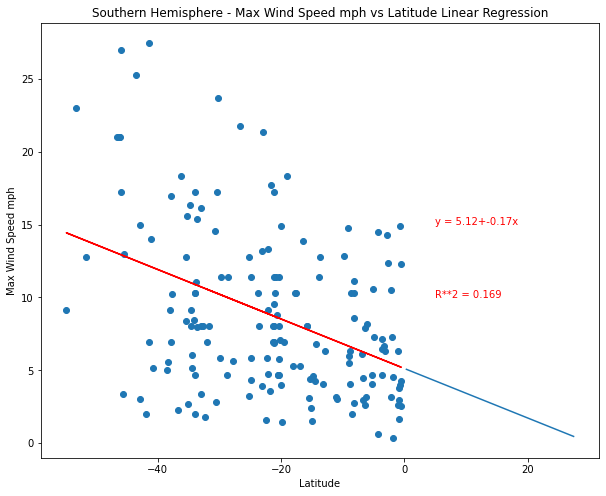

In [114]:
predictions = model.predict(x)

plt.scatter(cities_southern["lat"], cities_southern["Wind Speed_mph"])
plt.plot(x, predictions, color="red")
plt.text(5, 15, formula, color="red")
plt.text(5, 10, r_squared_string, color="red")
plt.plot(x_range, y_predict)
plt.title("Southern Hemisphere - Max Wind Speed mph vs Latitude Linear Regression")
plt.rcParams["figure.figsize"] = 10, 8
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed mph")
plt.show()